In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 10

# Read CSV into variable wine

In [2]:
wine = pd.read_csv('winequality/winequality.csv', sep=';', header=0)

In [3]:
quality_r = sorted(wine[wine.type=='red']['quality'].unique().tolist())
quality_w = sorted(wine[wine.type=='white']['quality'].unique().tolist())
quality = {'red':quality_r, 'white':quality_w}
print(quality)

{'white': [3, 4, 5, 6, 7, 8, 9], 'red': [3, 4, 5, 6, 7, 8]}


# 畫圖看看哪些feature和wine quality比較有關係。
以紅色代表紅酒，白色代表白酒

/Users/Jacklin/anaconda3/envs/tensor_flow_py3p5/lib/python3.5/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


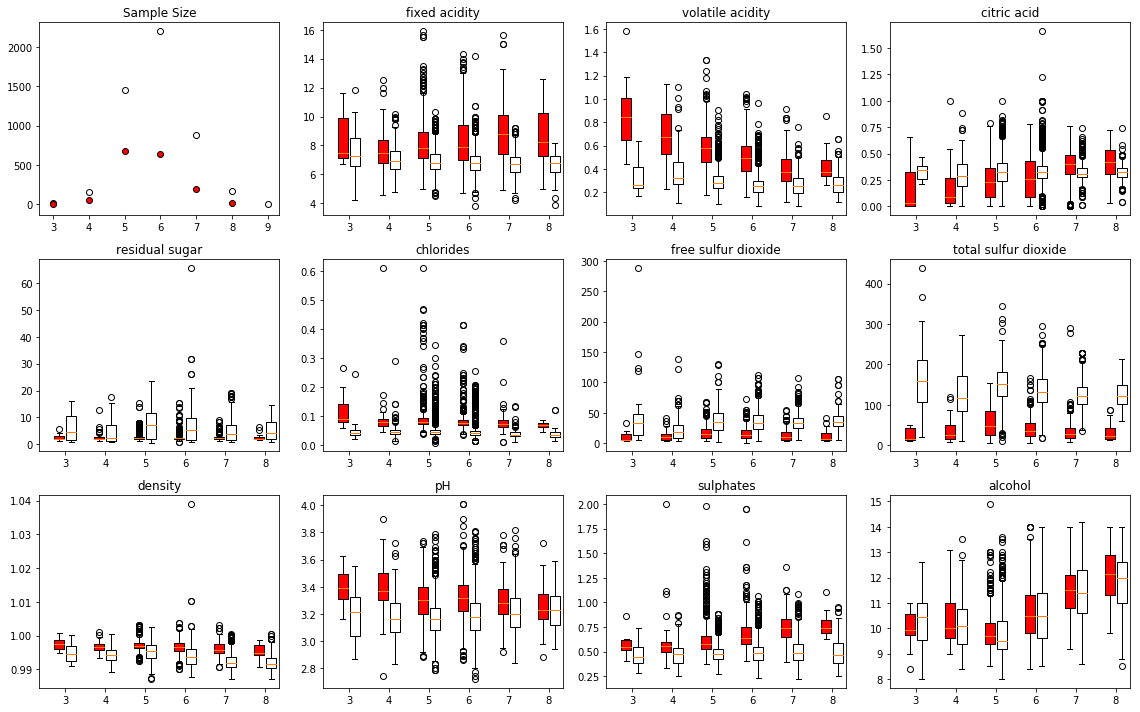

In [4]:
color='rb'
label = ['red', 'white']
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.tight_layout()
    for wine_type in quality:
        
        if wine_type =='red':
            pos = [x+0.85 for x in range(len(quality[wine_type]))]
        elif wine_type =='white':
            pos = [x+1.15 for x in range(len(quality[wine_type]))]
        
        if i ==0:
            data = [wine.loc[(wine.type==wine_type) & (wine.quality==k)].shape[0] for k in quality[wine_type]]
            plt.title('Sample Size')
            plt.scatter(quality[wine_type], data, facecolor=wine_type, edgecolors='black')
        else:    
            data = [ wine.loc[(wine.type==wine_type) & (wine.quality==k)].iloc[:,i] for k in quality[wine_type] ]
            plt.title(wine.columns[i])
            plt.boxplot(data, positions = pos, widths = 0.25, patch_artist=True, boxprops=dict(facecolor=wine_type))
            plt.xticks([i+1 for i in range(len(quality[wine_type]))], quality[wine_type])
    
plt.show()

# 將資料做training 和 testing 的split

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

choice = 'white'
train_X, test_X, train_y, test_y = train_test_split(wine[wine.type==choice].iloc[:,1:-1].values
                              , wine[wine.type==choice].iloc[:,-1].values, test_size=0.25
                              , shuffle=True, random_state=42)
train_X = scale(train_X)
test_X = scale(test_X)

# Make Prediction with SVM Model
將此問題當成分類問題。

In [6]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
model = svm.SVC(kernel = 'rbf')
parameter = {'C':[60,70,80,90], 'gamma':[1,3, 1.5, 1.7]}
best_model = GridSearchCV(model, parameter, cv=3)
best_model.fit(train_X, train_y)
best_model.best_estimator_

SVC(C=60, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
prediction = best_model.predict(test_X)
from sklearn.metrics import mean_absolute_error, classification_report, confusion_matrix, accuracy_score
print(classification_report(test_y, prediction))
print('accuracy:', accuracy_score(test_y, prediction))
print('mae:', mean_absolute_error(test_y, prediction))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         7
          4       0.50      0.12      0.20        32
          5       0.74      0.54      0.62       358
          6       0.59      0.84      0.70       544
          7       0.80      0.54      0.64       241
          8       0.89      0.40      0.55        43

avg / total       0.68      0.66      0.64      1225

accuracy: 0.656326530612
mae: 0.401632653061


/Users/Jacklin/anaconda3/envs/tensor_flow_py3p5/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
confusion_matrix(test_y, prediction)